# Analisis Sentimen

# 1. Import libraries

In [16]:
#import os, re, json, string, pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

## Load Data

In [17]:
data = pd.read_csv('E:\Program\M\Code\Program\Stemmer_2\FInal\Data Final\Data_Lex\Lex_Indihome.csv')
# data2 = pd.read_csv('E:\Program\M\Code\Program\Stemmer_2\FInal\Data\Data (@indihome)\Data Keseluruhan\indihomecare.csv')
# data3 = pd.read_csv('E:\Program\M\Code\Program\Stemmer_2\FInal\Data\Data (@FirstMed)\Firstmed_29_10.csv')

## Menggabungkan Data

In [18]:

# Concate data
# data = pd.concat([data1,data2,data3])
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Tanggal,User ID,Data Teks,Data Teks_CaseFolding,Data Teks_Clean,Data Teks_clean_alay,Data Teks_Token,Data Teks_Filter,Data Teks_Stopword,jumlah_polarity,sentimen
0,8789,9773,9773,2021-10-08 14:14:46+00:00,0002738s,@berrtitit @yowimiya @honkaistarrail parah bgt...,@berrtitit @yowimiya @honkaistarrail parah bgt...,parah bgt dikatain,parah begitu dikatain,"['parah', 'begitu', 'dikatain']","['parah', 'dikatain']",parah dikatain,-1,negatif
1,4228,50608,50608,2021-10-07 23:19:08+00:00,001Arel,@IndiHomeCare https://t.co/TmZdy4Wbzs,@indihomecare https://t.co/tmzdy4wbzs,NaN,NaN,[''],[''],NaN,0,netral
2,11858,48559,48559,2021-10-09 06:02:42+00:00,01idham,@IndiHomeCare Oke cek dm ya,@indihomecare oke cek dm ya,oke cek,oke cek,"['oke', 'cek', '']","['oke', 'cek', '']",oke cek,0,netral
3,9818,63158,63158,2021-10-01 14:46:21+00:00,02Lulo,"hello @IndiHomeCare lulo ingin curhat nih, se...","hello @indihomecare lulo ingin curhat nih, se...",hello lulo ingin curhat nih selama sebulan tep...,halo lulo ingin curhat ini selama sebulan tepa...,"['halo', 'lulo', 'ingin', 'curhat', 'ini', 'se...","['halo', 'lulo', 'curhat', 'sebulan', 'tepatny...",halo lulo curhat sebulan tepatnya september in...,-2,negatif
4,8414,15459,15459,2021-10-25 12:52:33+00:00,0318st___,@IndiHomeCare min ini gangguannya sampai kapan? 😶,@indihomecare min ini gangguannya sampai kapan? 😶,min ini gangguannya sampai kapan,admin ini gangguannya sampai kapan,"['', 'admin', 'ini', 'gangguannya', 'sampai', ...","['', 'admin', 'gangguannya']",admin gangguannya,0,netral


In [19]:
# Cleanner 
def cleaning(text):
    text= text[2:]
    text = text.replace('\n',' ')
    return text

In [20]:
data['Data Teks_Filter'] =  data['Data Teks_Filter'].apply(lambda x : cleaning(x))
data['Data Teks_Filter'].values

array(["parah', 'dikatain']", "']", "oke', 'cek', '']", ..., "st']",
       "halo', 'admin', 'jangkauan', 'sinyal', 'wifi', 'dikurangin', 'wifiku', 'dibobol', 'tetangga', 'admin', 'sinyalnya', 'kerumah']",
       "tolong', 'banget', 'pusing', 'kuliah', 'wifi', 'lemottttt', 'nambah', 'beban']"],
      dtype=object)

# 2. Data Preprocessing

## 2.1. Preprocessing

In [21]:
#@ E:\Program\M\Code\Program\Stemmer_2\FInal\S_Pre_Processing.ipynb

## 2.2. Text Vectorizing

In [22]:
# Defining Vectorizer object
vectorizer_tfidf = TfidfVectorizer(min_df=0.01, max_df=0.6)

# Load saved vectorizer
# vectorizer_tfidf = pickle.load(open('../model/vectorizer/vectorizer_tfidf.pickle', 'rb'))

In [23]:
# fit and transform text data
word_tfidf = vectorizer_tfidf.fit_transform(data['Data Teks'].values)

# Load saved transformed data
# word_tfidf = pickle.load(open('../model/vectorizer/word_tfidf.pickle', 'rb'))

In [24]:
# Nama fitur
nama_fitur = vectorizer_tfidf.get_feature_names()

# Dimensi data
dimensions = word_tfidf.get_shape()
print(f"Jumlah artikel = {dimensions[0]}")
print(f"Jumlah fitur   = {dimensions[1]}")

Jumlah artikel = 5944
Jumlah fitur   = 182


C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 2.3. Kata dengan bobot TF-IDF tertinggi

In [25]:
content1, content2 = [], []

for n in range(dimensions[0]):
    # Convert sparse matrix row by row 
    row = word_tfidf.getrow(n).toarray()[0].ravel()
    # Get top values and its indexes 
    top_ten_indices = row.argsort()[-1]
    top_ten_values = row[row.argsort()[-1]]
    # Identify the highest TFIDF value and word #
    highestTFIDFword = nama_fitur[top_ten_indices]
    highestTFIDFvalue = top_ten_values
    top1word = {'nomor artikel': n+1, 'nilai TFIDF': highestTFIDFvalue,
                'top word': highestTFIDFword}
    content1.append(top1word)
    content2.append(highestTFIDFword)

# Hitung Frekuiensi kata dengan bobot terbesar
content2 = np.asarray(content2)
words, n = np.unique(content2, return_counts=True)

# Convert to DataFrame lalu urutkan secara descending
# lalu pilih 20 kata dengan frekuensi terbesar 
words_data = pd.DataFrame({
    'Kata': words,
    'Banyak': n
}).sort_values(by='Banyak', ascending=False).head(20)
words_data

,Kata,Banyak
56,indihome,255
180,yg,181
27,cek,170
71,kak,105
55,https,104
170,tolong,93
35,di,93
141,saya,92
152,sudah,67
89,lagi,58


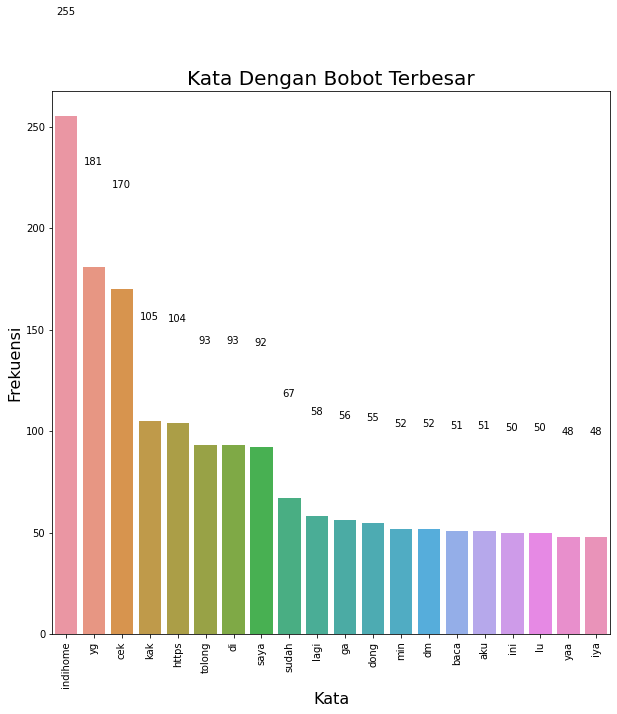

In [26]:
# Plotting Barplot
plt.figure(figsize = (10,10))
sns.barplot(x = words_data['Kata'],y = words_data['Banyak'])
for i, v in enumerate(words_data['Banyak'].tolist()):
    plt.text(i-len(str(v))/10-.05, v + 50, str(v),fontsize=10)
plt.title('Kata Dengan Bobot Terbesar',fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Kata',fontsize=16)
plt.ylabel('Frekuensi',fontsize=16)
plt.show()